# Implementing Stochastic Gradient Descent on LTU

A Linear Threshold Unit(LTU) is a simple artificial neuron whose output is the thresholded  weighted sum of its inputs. What does that mean?<br><br> 
Let x1,x2,x3 be the inputs to the LTU.<br>
For some arbitrary weights (w1,w2,w3), the weighted sum of these inputs would be calculated as <strong>w1x1 + w2x2 + w3x3</strong>.
If <strong>T</strong> is the threshold of the LTU, then<br><br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
+1, 
&emsp;&emsp;
if w1x1 + w2x2 + w3x3 >= T<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 
h(x) = <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
-1, 
&emsp;&emsp;otherwise

If a set of points can be seperated by a linear decision boundary(or a hyperplane in multiple dimensions), then they are said to be <strong>linearly seperable</strong>. For example, the AND,OR or NAND gates can have 0s and 1s seperated by a line. On the other hand, XOR is not linearly seperable.<br>
LTUs can be used to represent such linearly seperable classes.<br>

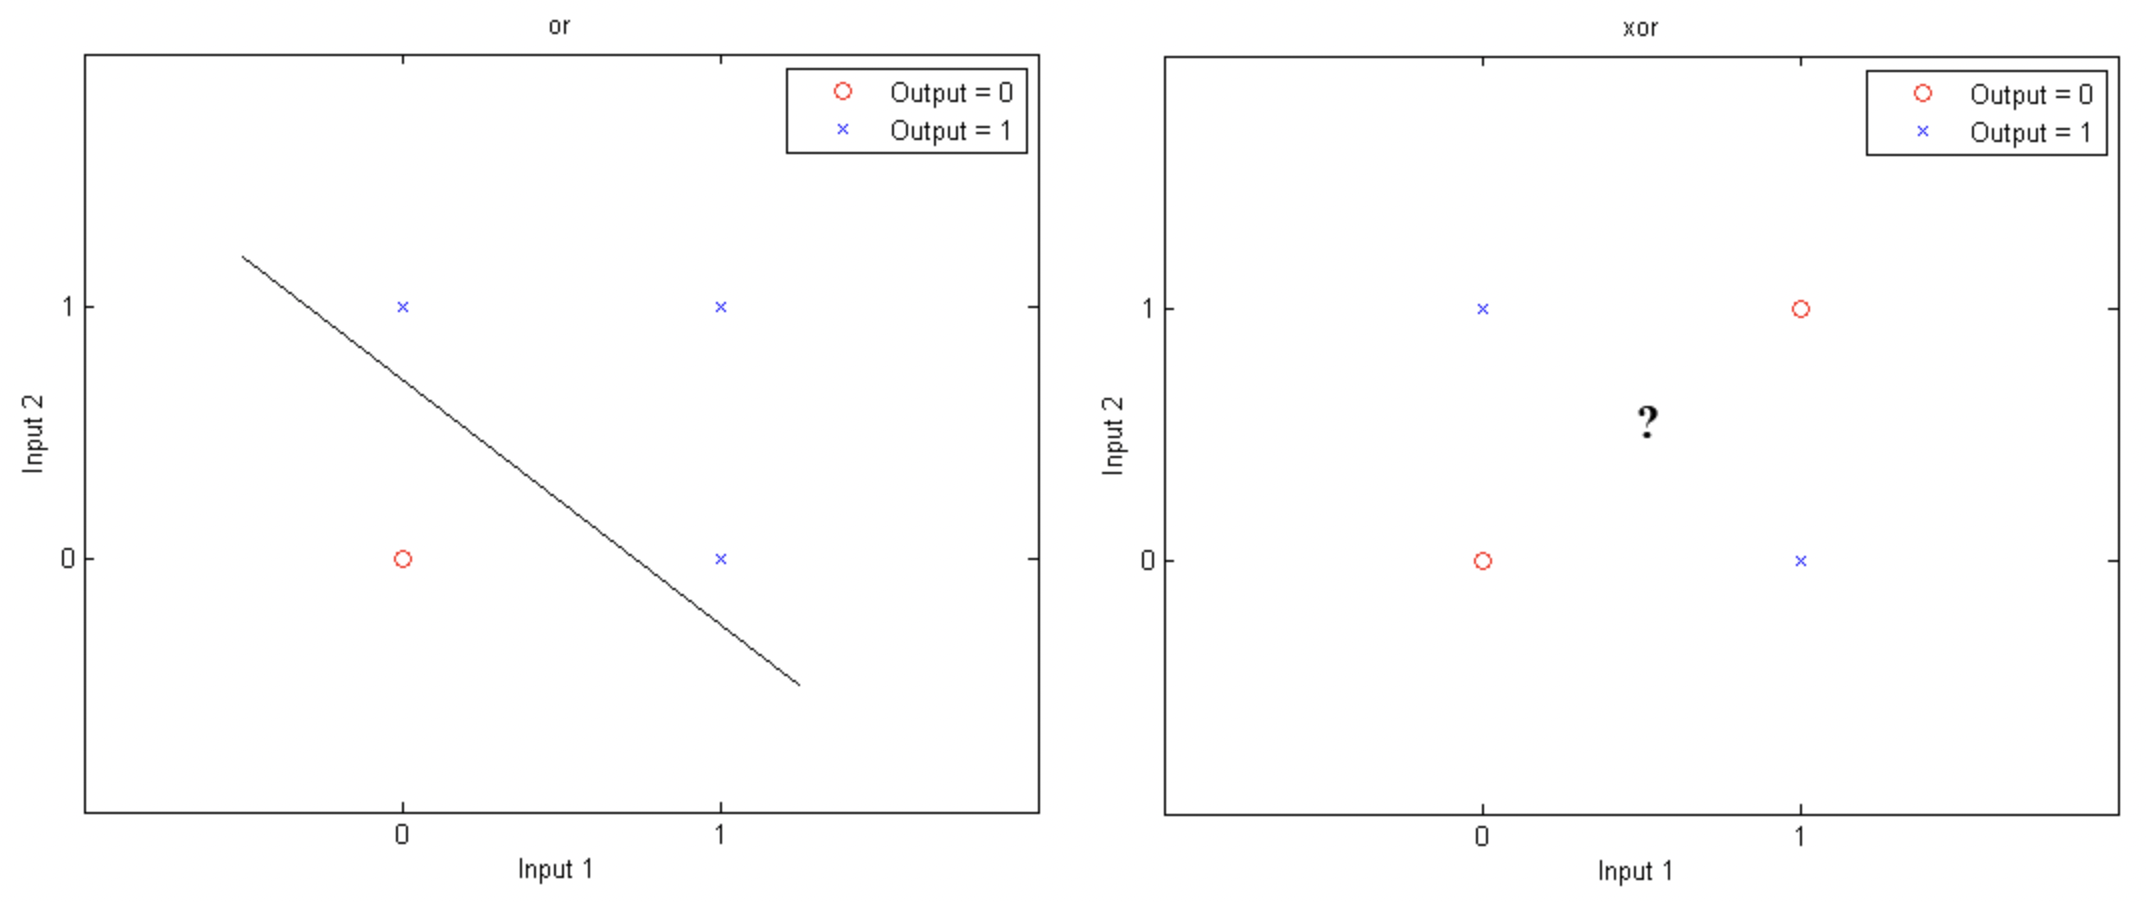



### Training to learn the weights for AND Gate

Consider four input features(x1,x2,x3,x4). The AND Gate is represented as  x1 ∧ x2 ∧ x3 ∧ x4 <=> y , i.e, y is  true iff all the inputs are true.<br>
<strong>Goal:</strong> to learn the weights of a function represented by an LTU that approximates an AND gate.


### Using MSE as the Loss function

In order to do some learning, we need a loss function against which the algorithm calculates the loss and performs gradient descent to find the local minima.<br>
For one training example:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
Cost, J[i] = ( y_true[i] - y_pred[i] )^2<br><br>
The gradient (dJ[i]/dw) for the ith example and jth feature will be<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
             dJ[i]/dw[j] = -2 * (y[i] - y_pred[i]) * x[i][j]

<strong>Stoachastic Gradient Descent Algorithm</strong> <br>
Repeat
<br>
&emsp;&emsp;  for each training example i:
<br>
&emsp;&emsp;&emsp;&emsp;Compute hx(x[i],w) as y_hat
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;for each feature j:
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;g[j] = -2 * (y[i] - y_hat) * x[i][j]
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;w[j] = w[j] - learning_rate * g[j]
<br>
<br>
The overall gradient is approximated by the gradient from each training example.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd

In [2]:
'''
 hx is the thresholded weighted sum. The threshold we have chosen is 1 (this is a hyperparameter)
 The method takes two parameters:
    x: one input value of shape (4,1) [since we have 4 features]
    w: weight vector of shape (4,1)  [since each feature requires a corresponding weight]
'''
def hx(x,w): 
    u = np.dot(w.T, x)   
    if u>=1:
        return 1
    else:
        return 0

"""
 SGD_mse performs stochastic gradient descent using mean squred error as the Loss function. 

 The method takes the followinf input parameters:
     X:             input matrix of shape (16,4,1) since we have 16 training examples, and each input is of shape (4,1)
     y:             output vector of shape (16,1) corresponding to 0/1 for each training example
     w:             weight vector of shape (4,1)
     alpha:         learning rate
     num_examples:  number of training examples
     num_features:  number of features in the input
     iterations:    number of iterations to run the gradient descent algorithm
     
 This method updates the weight vector w

"""
def SGD_mse(X, y, w, alpha, num_examples, num_features, iterations):
    for iter in range(iterations):
        g = np.zeros((num_features, 1))
        for i in range(num_examples):
            y_hat = hx(X[i],w)
            for j in range(num_features):
                g[j] = -2 * (y[i] - y_hat) * X[i][j]
                w[j] -= alpha*g[j]
    print("\nAfter learning, w: \n",w)
        

#Helper function to compare true and predicted values                
def validate(X,Y_true,w):
    for i in range(X.shape[0]):
        y_hat = hx(X[i],w)
        print("True: ",Y[i], "\tPredicted: ",y_hat)

In [3]:
#import the data using Pandas
data_df = pd.read_csv("data.csv")
print(data_df.head())

   x1  x2  x3  x4  y
0   0   0   0   0  0
1   0   0   0   1  0
2   0   0   1   0  0
3   0   0   1   1  0
4   0   1   0   0  0


In [4]:
X = np.array(data_df[['x1','x2','x3','x4']])
Y = np.array(data_df['y'])

print("X: ",X)
print("Y: ",Y)
X.shape

X:  [[0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [1 1 0 1]
 [1 1 1 0]
 [1 1 1 1]]
Y:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


(16, 4)

In [5]:
num_examples = X.shape[0]
num_features = X.shape[1]

w = np.zeros((num_features,1))
print("Initially, weight vector w: \n",w)

Initially, weight vector w: 
 [[0.]
 [0.]
 [0.]
 [0.]]


In [6]:
#Calling the SGD_mse method for learning
SGD_mse(X,Y,w,0.1,num_examples, num_features, 10)


After learning, w: 
 [[0.4]
 [0.2]
 [0.2]
 [0.2]]


In [7]:
#Validating
validate(X,Y,w)

True:  0 	Predicted:  0
True:  0 	Predicted:  0
True:  0 	Predicted:  0
True:  0 	Predicted:  0
True:  0 	Predicted:  0
True:  0 	Predicted:  0
True:  0 	Predicted:  0
True:  0 	Predicted:  0
True:  0 	Predicted:  0
True:  0 	Predicted:  0
True:  0 	Predicted:  0
True:  0 	Predicted:  0
True:  0 	Predicted:  0
True:  0 	Predicted:  0
True:  0 	Predicted:  0
True:  1 	Predicted:  1
